([<matplotlib.axis.XTick at 0x7fd355a078b0>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '125.0'),
  Text(2, 0, '250.0'),
  Text(3, 0, '375.0'),
  Text(4, 0, '500.0'),
  Text(5, 0, '625.0'),
  Text(6, 0, '750.0'),
  Text(7, 0, '875.0'),
  Text(8, 0, '1000.0')])

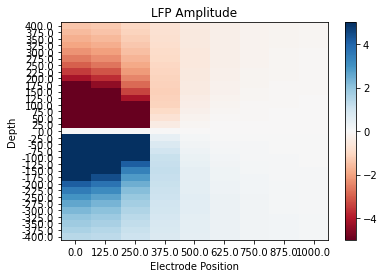

In [152]:
import numpy as np
import matplotlib.pyplot as plt
"z: depth from the electrode to the midpoint of the neuron in micrometers"
z = np.linspace(400, -400, 33)
"pop_radius: radius of the population of neurons in micrometers"
pop_radius = 250
"x: electrode positions spaced 125 micrometers apart"
x = np.linspace(0, 4, 9) * pop_radius
"x_neurons: represents 4000 random neurons at various positions in the population"
x_neurons = np.random.uniform(-250, 250, (4000))
"z_neurons: represents neurons at various depths in the population"
z_neurons = 0

def calculate(x, z):
    r = np.sqrt(x**2 + z**2)
    L = 250
    sigma = 0.3
    costheta = -z / r
    return (L * costheta) / (4 * np.pi * sigma * (r ** 2))

XX, ZZ = np.meshgrid(x, z)
XX = XX[..., np.newaxis] - x_neurons
ZZ = ZZ[..., np.newaxis] - z_neurons
f = calculate(XX, ZZ).sum(axis = 2)

plt.figure()
plt.imshow(f, cmap = 'RdBu', aspect='auto')
plt.clim(-5,5)
plt.colorbar()
plt.title('LFP Amplitude')
plt.ylabel('Depth')
plt.xlabel('Electrode Position')
plt.yticks(range(33), labels=z)
plt.xticks(range(9), labels=x)